## Machine Learning - Ex.2


Submitted by: **Raz Gvili**

In [141]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [218]:
def step_gradient(X, y, w_vec, learning_rate, sampels_amount):
        
    w_grad = np.zeros(w_vec.size)
    
    # update each param
    for w_param in range(0, w_vec.size):
        
        # sum of all sampels for each w_param 
        for sample in range(0, sampels_amount):
            w_grad[w_param] = (((np.dot(w_vec, X[sample])) - y[sample]) * X[sample][w_param])
            
        w_grad[w_param] *= (1/float(sampels_amount))
    
    next_w = w_vec - (learning_rate * w_grad)
    
    for sample in range(0, sampels_amount):
        J = (((np.dot(w_vec, X[sample])) - y[sample]) * (1/float(sampels_amount)))
    
    return J, next_w

## Multivariate Linear Regression

In this exercise we will implement a gradient descent algorithm to solve multivariate linear regression problems.

Then, we will test our algorithm on two different problems:

1. A simple 2-D dataset of housing prices: house price $y$ (in $) as a function of its living area $x_1$ (in square feet) and the number of bedrooms $x_2$.

2. A *non-linear* 1-D problem. 



As a first step, **implement the gradient descent algorithm** (for multivariate linear regression) as discussed in class.

The algorithm should get the $N\times (d+1)$ design matrix $X$ containing all the features ($N$ data samples, each one consists of $d+1$ features) and an $N$-vector of the corresponding $y$ values.

The algorithm starts from an initial guess of $\vec{w}\in\mathcal{R}^{d+1}$ of a vector of zeros, and iterates over the update rule for $T$ steps.

The algorithm returns the final weights vector: $\vec{w}^{(T)}=(w_0,w_1,...,w_d)$, and the values of the cost function along the run: $\vec{J}=(J^{(1)},J^{(2)},...,J^{(T)})$.


In [219]:
def gradient_descent (X, y, alpha=0.000001, T=100):
    
    sampels_amount = X[:,0].size
    
    ones = np.ones((sampels_amount,1))
    X = np.hstack((ones, X))
    
    # to hold the cost function value J at each iteration
    J = np.zeros(T)
    
    # initial guess 
    w = np.zeros(X.shape[1])
    
    for i in range(T):
        J[i], w = step_gradient(X, y, w, alpha, sampels_amount)
    
    return w, J

### 1. Housing problem (simplified version)

Download and import the dataset files: `ex2x.dat` and `ex2y.dat`.

Explore the dataset: 
- How many samples it has? **47**
- How many features each of the samples has? **2** 
- Are the features discrete or continous? **discrete**
- What is the range of each of the features (min to max)? **size: 852.0 - 4478.0 , rooms: 1.0 - 5.0**
- What is the range of the target values (the prices)? **price:169900.0 - 699900.0**

In [220]:
x = np.loadtxt('ex2x.dat')
y = np.loadtxt('ex2y.dat')

print("x")
print("sampels: ", x[:,0].size)
print("sampels features: ", x.shape[1])
print("feature 1 range (size of aprt):", min(x[:,0]), "-", max(x[:,0]))
print("feature 2 range (room amount):", min(x[:,1]), "-", max(x[:,1]))

print("")

print("y")
print("price range:", min(y), "-", max(y))

x
sampels:  47
sampels features:  2
feature 1 range (size of aprt): 852.0 - 4478.0
feature 2 range (room amount): 1.0 - 5.0

y
price range: 169900.0 - 699900.0


Use your gradient descent algorithm to find an optimal solution $\vec{w}$ for the multivariate linear model:

$$ \hat{y} = w_0 + w_1 x_1 + w_2 x_2 $$

where $x_1$ is the house area and $x_2$ is the number of bedrooms. (hint: don't forget to add a column of `ones` to  the design matrix $X$).

- Verify that the algorithm has indeed converged by ploting the graph of $J(t)$). If the graph diverges, try to decrease the learning rate by a factor of 10.
- Print the values of the final $\vec{w}$.
- Use $\vec{w}$ to estimate the price of a house with 1650 square feet and 3 bedroom (hint: should be around 300,000$).



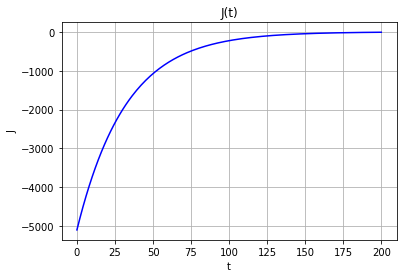

w0:  0.16517199358360257
w1:  198.7019082810738
w2:  0.4955159807508077

price estimation:  327859.8003837076


In [228]:
T = 200
w, J = gradient_descent(x, y, 0.000001, T)
t = np.linspace(0, T, T)

# Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()

# w values 
print("w0: ", w[0])
print("w1: ", w[1])
print("w2: ", w[2])

# test model accuracy 
size = 1650
rooms = 3

est = w[0] + w[1] * size + w[2] * rooms

print("")
print("price estimation: ", est)

### 2. Non-linear (polynomial) fit

In this section we will fit to the data a **polynomial model** of degree $d$,

$$ f(x;w) = w_0 + w_1 x + w_2 x^2 + ... + w_d x^d $$

Lets generate some data:

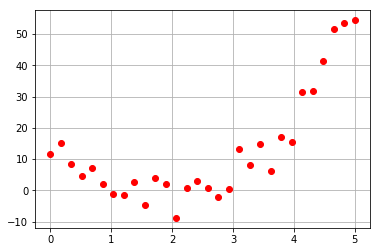

In [272]:
N = 30

# generate N sample points 
x = np.linspace(0,5,N) 
y = x**3 -2*x**2 -5*x + 10 # 3rd degree polynom
y += np.random.randn(N)*4 # add gaussian noise (with sigma = 4)

# plot the data
plt.plot(x,y,'or')
plt.grid()
plt.show()

As a first step, write a function that generates a $N\times(d+1)$ **design-matrix** from the data $\{x_i\}_{i=1}^N$, where the $j$-th coloumn ($j=0,1,...,d)$ contains the values of $(x_i)^j$.

tip: you can use numpy's *broadcasting* technique to perform that without any loops: 

- http://www.labri.fr/perso/nrougier/from-python-to-numpy/index.html#broadcasting

In [306]:
### Generate the design-matrix ....

def design_matrix(x, d):

    X = x.copy()
    if (d > 1):
        for i in range(2, d+1):
            pow = i
            X = np.hstack((X, x**pow))
     
    X = X.reshape((x.size,d), order='F')
    return X  


# test your code using this:
test = design_matrix(np.arange(6),3)

# did you get what you expect?
print(test)


[[  0   0   0]
 [  1   1   1]
 [  2   4   8]
 [  3   9  27]
 [  4  16  64]
 [  5  25 125]]


Next, use your algorithm to fit a **cubic** model to the data:

$$ f(x;w)=w_0 + w_1 x + w_2 x^2 + w_3 x^3 $$

Verify that the algorithm has indeed converged (plot J, or better log(J), as a function of iteration).



parameters:  [0.00334465 0.01672323 0.08361615 0.41808076]


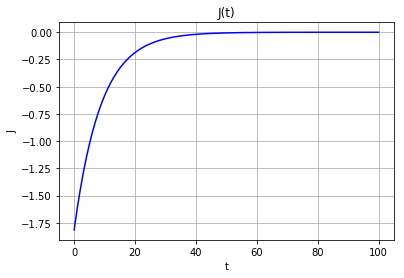

In [326]:
T = 100

des_mat = design_matrix(x, 3)

w, J = gradient_descent(des_mat, y, 0.0002, T)
print("parameters: ", w)

t = np.linspace(0, T, T)

# Plot J(t)
plt.plot(t,J,'blue')
plt.xlabel('t')
plt.ylabel('J')
plt.title('J(t)')
plt.grid()
plt.show()

Finally, plot the sample points $\{(x_i,y_i)\}_{i=1}^N$ together with the fitted polynom $f(x;w)$:


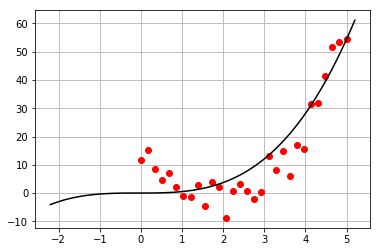

In [348]:
xx = np.linspace(-2.2,5.2,100) 
yy = w[0] + w[1]*xx + w[2]*xx**2 + w[3]*xx**3

plt.plot(x,y,'or',xx,yy,'-k')
plt.grid()
plt.show()

## Good luck !